In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vR9KjJA_rrZJ-SYavWeKU2MZpVVGQd7k0PH64lX5VJ9BnjEKeJaWEh83xYjuR24YhJxM8brSZHY9Jxn/pub?output=csv"
df = pd.read_csv(url)
df.head()


,Name,City,State,Zip,Type Detailed*,Current Guaranteed Minimum,Average Daily Population,Current as of**
0,ADAMS COUNTY DET CENTER,NATCHEZ,MS,39120.0,DIGSA,"1,100","2,154",03/17/2025
1,ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,92301.0,CDF,640,66,03/17/2025
2,ALAMANCE COUNTY DETENTION FACILITY,GRAHAM,NC,27253.0,IGSA,40,20,03/17/2025
3,ALEXANDRIA STAGING FACILITY,ALEXANDRIA,LA,71303.0,STAGING,NaN,313,03/17/2025
4,ALLEGANY COUNTY JAIL,BELMONT,NY,14813.0,IGSA,NaN,1,03/17/2025


In [4]:
# Remove rows where any cell contains the word "Total"
df = df[~df.apply(lambda row: row.astype(str).str.contains("Total", case=False)).any(axis=1)]

In [5]:
print(df.dtypes)

Name                           object
City                           object
State                          object
Zip                           float64
Type Detailed*                 object
Current Guaranteed Minimum     object
Average Daily Population       object
Current as of**                object
dtype: object


In [6]:
# Ensure 'Zip' is an object (string)
df['Zip'] = df['Zip'].astype(str)

# Define the columns you want to convert (use the exact column names)
int_cols = ['Current Guaranteed Minimum', 'Average Daily Population']

# Convert these columns to numeric, coercing errors, then cast to a nullable integer type
df[int_cols] = df[int_cols].apply(pd.to_numeric, errors='coerce').astype('Int64')

# Convert 'Current as of**' to datetime, coercing errors to NaT
df['Current as of**'] = pd.to_datetime(df['Current as of**'], errors='coerce')

print(df.dtypes)

Name                                  object
City                                  object
State                                 object
Zip                                   object
Type Detailed*                        object
Current Guaranteed Minimum             Int64
Average Daily Population               Int64
Current as of**               datetime64[ns]
dtype: object


In [7]:
adp_total=df.groupby('Current as of**')['Average Daily Population'].mean().reset_index()
print(adp_total.head())


  Current as of**  Average Daily Population
0      2019-09-30                173.009852
1      2020-08-21                165.845679
2      2020-09-04                166.871951
3      2020-09-18                166.720497
4      2020-11-14                113.907975


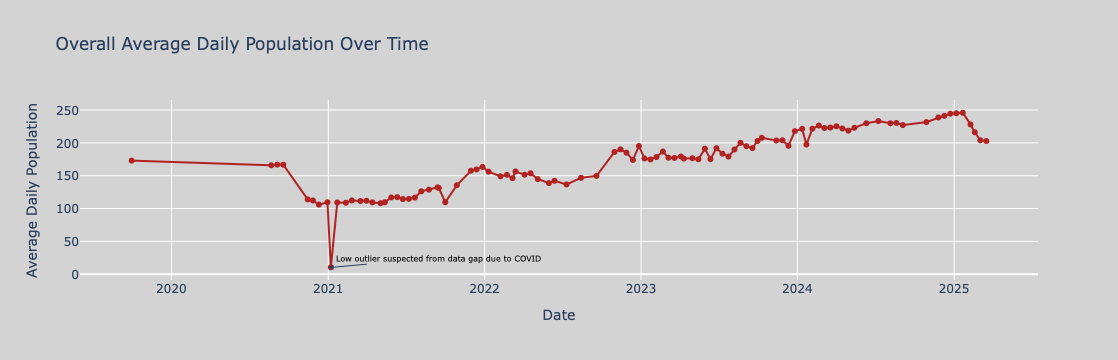

In [29]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'jupyterlab'

fig=px.line(adp_total,
            x='Current as of**',
            y='Average Daily Population',
            title="Overall Average Daily Population Over Time",
            markers=True,
            hover_data={'Current as of**': True, 'Average Daily Population': ':.2f'}
           )
fig.update_traces(line=dict(color='firebrick'), marker=dict(color='firebrick'))
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Average Daily Population',
    hovermode='x unified',
    paper_bgcolor='lightgrey',
    plot_bgcolor='lightgrey')

fig.add_annotation(
    x='2021',
    y=10,
    text="Low outlier suspected from data gap due to COVID",
    showarrow=True,
    arrowhead=2,
    ax=110,
    ay=-10,
    font=dict(color="black", size=8))

html_str = fig.to_html(include_plotlyjs='cdn')
with open("plotly_graph.html", "w") as f:
    f.write(html_str)

    
fig.show()